<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-04 13:38:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  41.6MB/s    in 4.7s    

2025-07-04 13:38:48 (42.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [25]:
!pip install pandas

In [26]:
!pip install seaborn

In [27]:
!pip install matplotlib

In [28]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [29]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [30]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [31]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


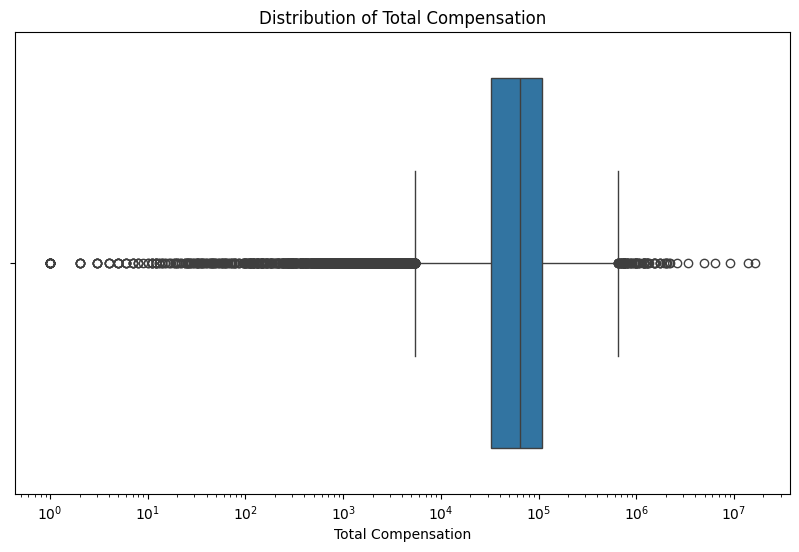

In [32]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT * FROM main WHERE ConvertedCompYearly IS NOT NULL"
df_filtered = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['ConvertedCompYearly'], log_scale=True)

# Set labels and title
plt.xlabel('Total Compensation')
plt.ylabel('') 
plt.title('Distribution of Total Compensation')

# Show the plot
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


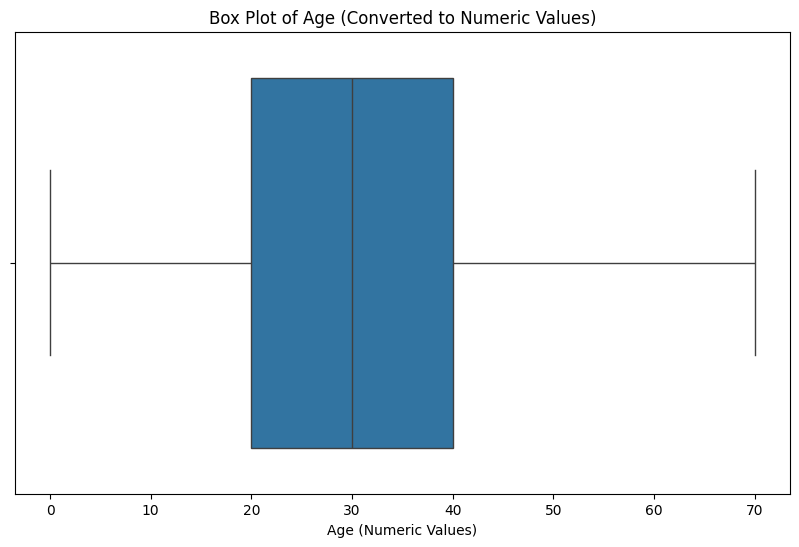

In [33]:

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert the 'Age' column to numeric values
age_mapping = {
    'Under 18 years old': 17, '18-24 years old': 20, '25-34 years old': 30, '35-44 years old': 40,
    '45-54 years old': 50, '55-64 years old': 60, '65 years or older': 70, 'Prefer not to say': 0
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Create the box plot for AgeNum
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeNum'])

# Set labels and title
plt.xlabel('Age (Numeric Values)')
plt.ylabel('')
plt.title('Box Plot of Age (Converted to Numeric Values)')

# Show the plot
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


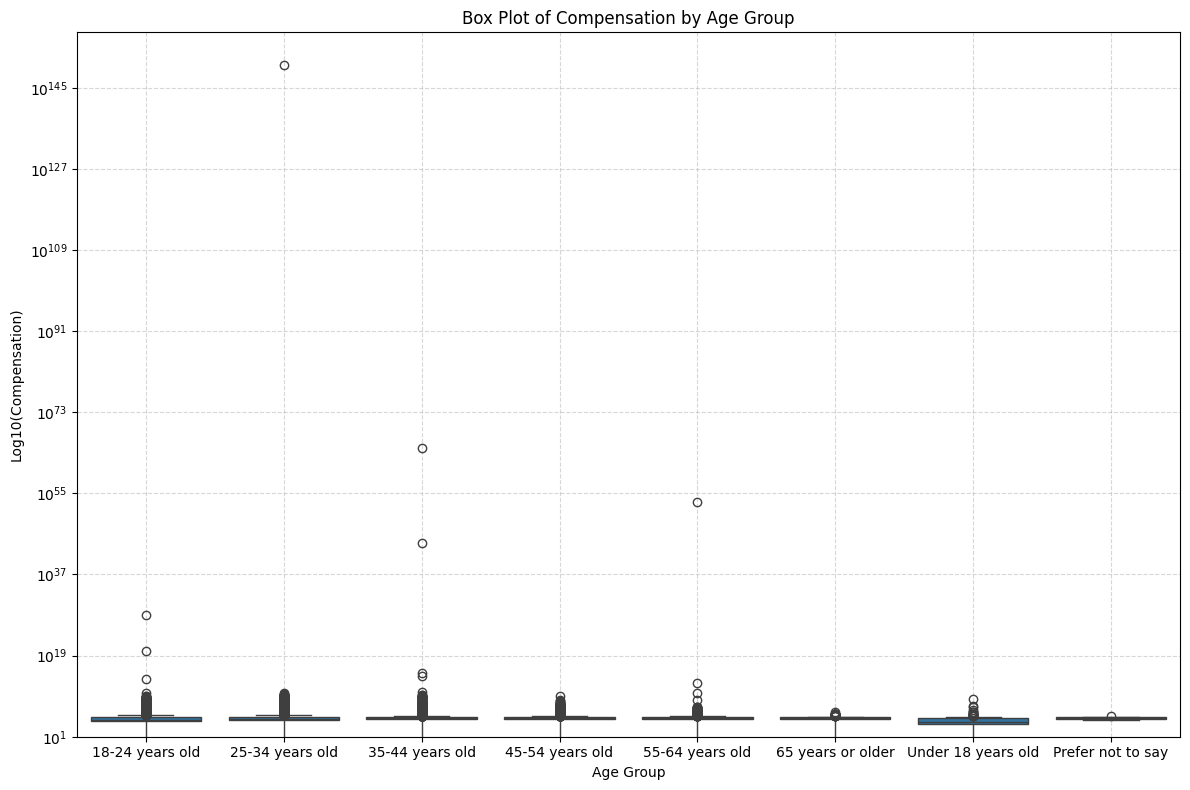

In [93]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Age, CompTotal FROM main WHERE CompTotal IS NOT NULL AND Age IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot the box plot for CompTotal grouped by Age
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='CompTotal', data=df)
plt.yscale('log')
plt.title('Box Plot of Compensation by Age Group')
plt.ylim(1e1,)
plt.xlabel('Age Group')
plt.ylabel('Log10(Compensation)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [88]:
import numpy as np
# Filter out compensation values above 10 million
df_clean = df[df['CompTotal'] < 1e7].copy()
df_clean = df_clean[df_clean['CompTotal'] >= 1e3]

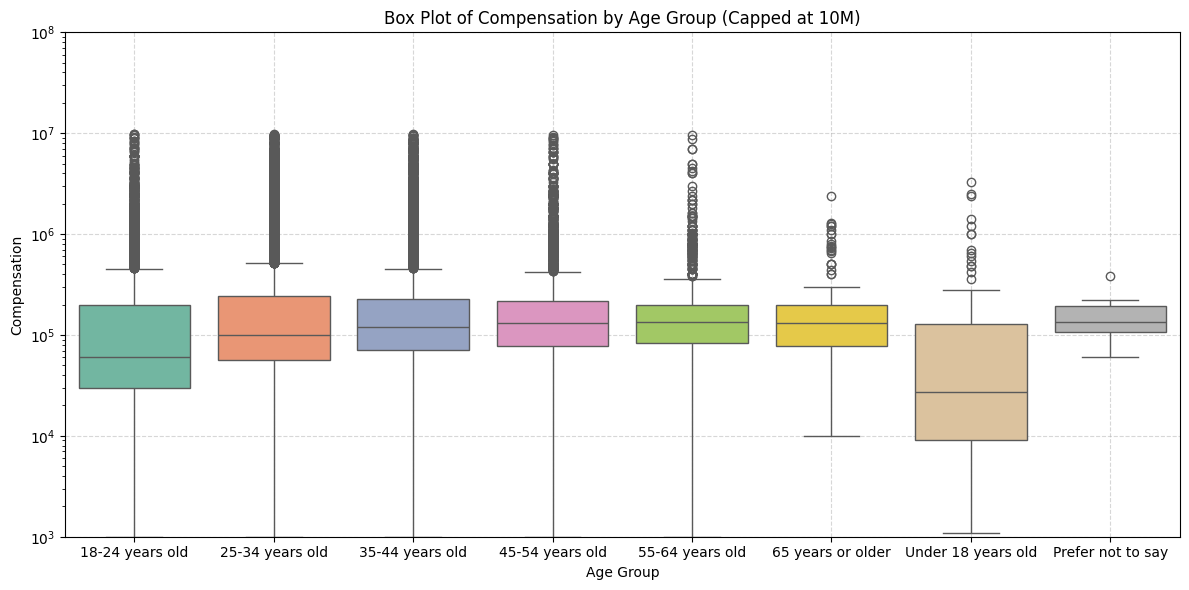

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='CompTotal', data=df_clean,hue='Age' ,palette='Set2')
plt.title('Box Plot of Compensation by Age Group (Capped at 10M)')
plt.xlabel('Age Group')
plt.ylabel('Compensation')
plt.yscale('log')
plt.ylim(1e3, 1e8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


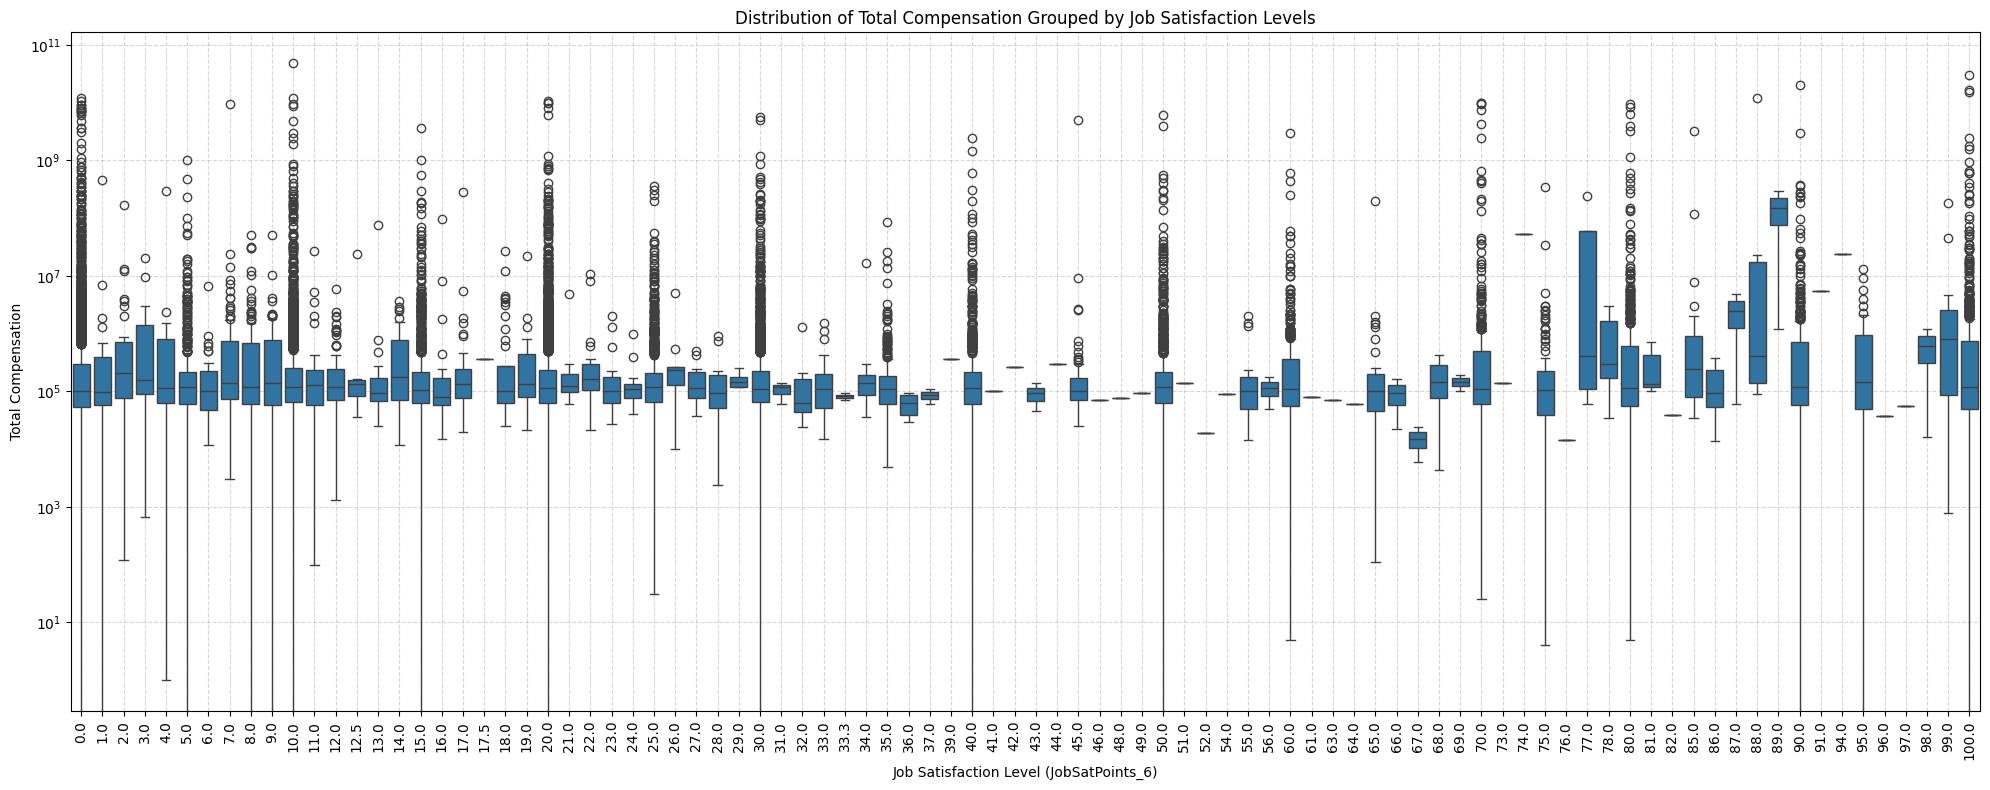

In [105]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT CompTotal, JobSatPoints_6 FROM main WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()
#clean
df_clean = df[df['CompTotal'] < 1e11].copy()

# Plot the box plot for CompTotal grouped by JobSatPoints_6
plt.figure(figsize=(20, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_clean)
plt.title('Distribution of Total Compensation Grouped by Job Satisfaction Levels')
plt.yscale('log')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.xticks(rotation=90)
plt.ylabel('Total Compensation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Examine how compensation varies based on job satisfaction levels.


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


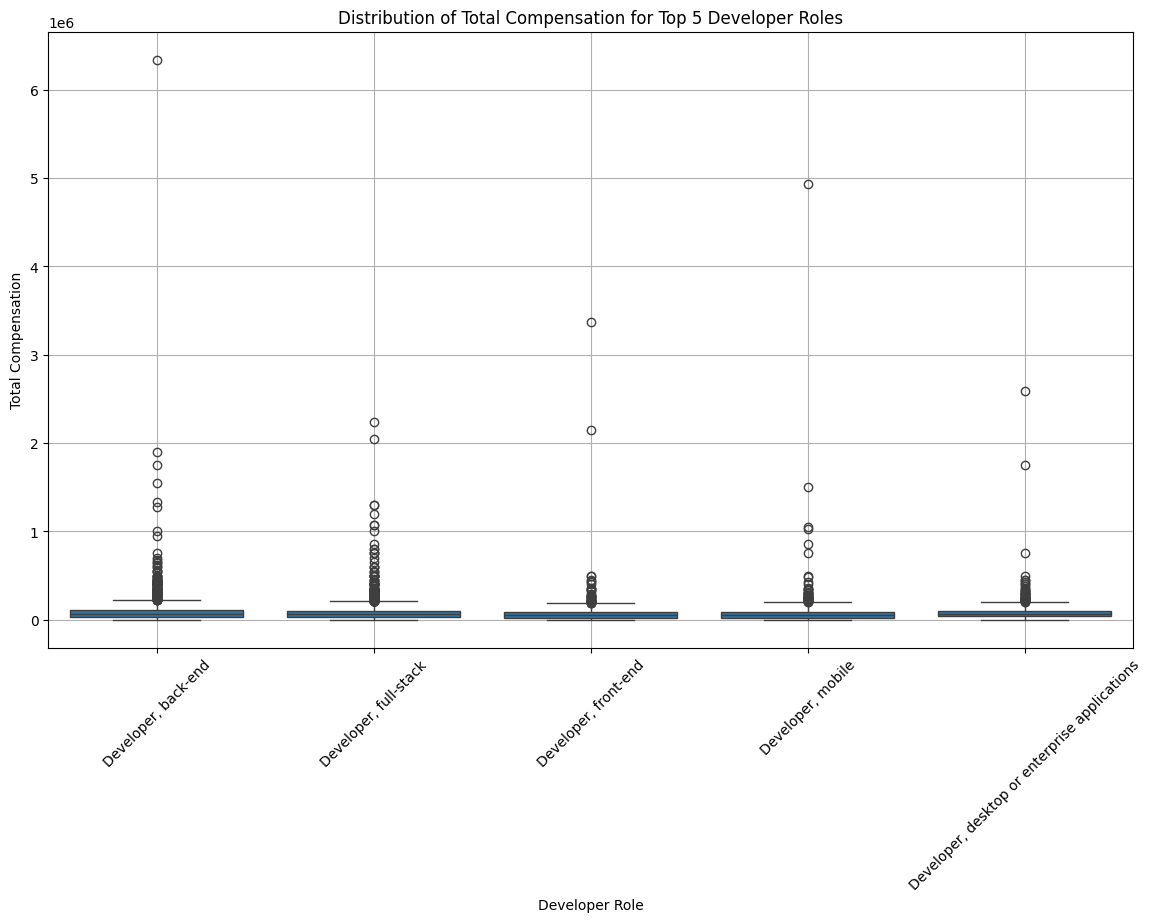

In [106]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT DevType, ConvertedCompYearly FROM main WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Split the 'DevType' column by ';' and explode it into separate rows
df_exploded = df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_exploded = df_exploded.to_frame(name='DevType')

# Safely repeat the 'ConvertedCompYearly' values
df_exploded['ConvertedCompYearly'] = df['ConvertedCompYearly'].loc[df.index].repeat(df['DevType'].str.count(';').values + 1).reset_index(drop=True)

# Get the top 5 developer types
top_5_devtypes = df_exploded['DevType'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 developer types
df_top_5 = df_exploded[df_exploded['DevType'].isin(top_5_devtypes)]

# Plot the box plot for ConvertedCompYearly grouped by DevType
plt.figure(figsize=(14, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5)
plt.title('Distribution of Total Compensation for Top 5 Developer Roles')
plt.xlabel('Developer Role')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(True)

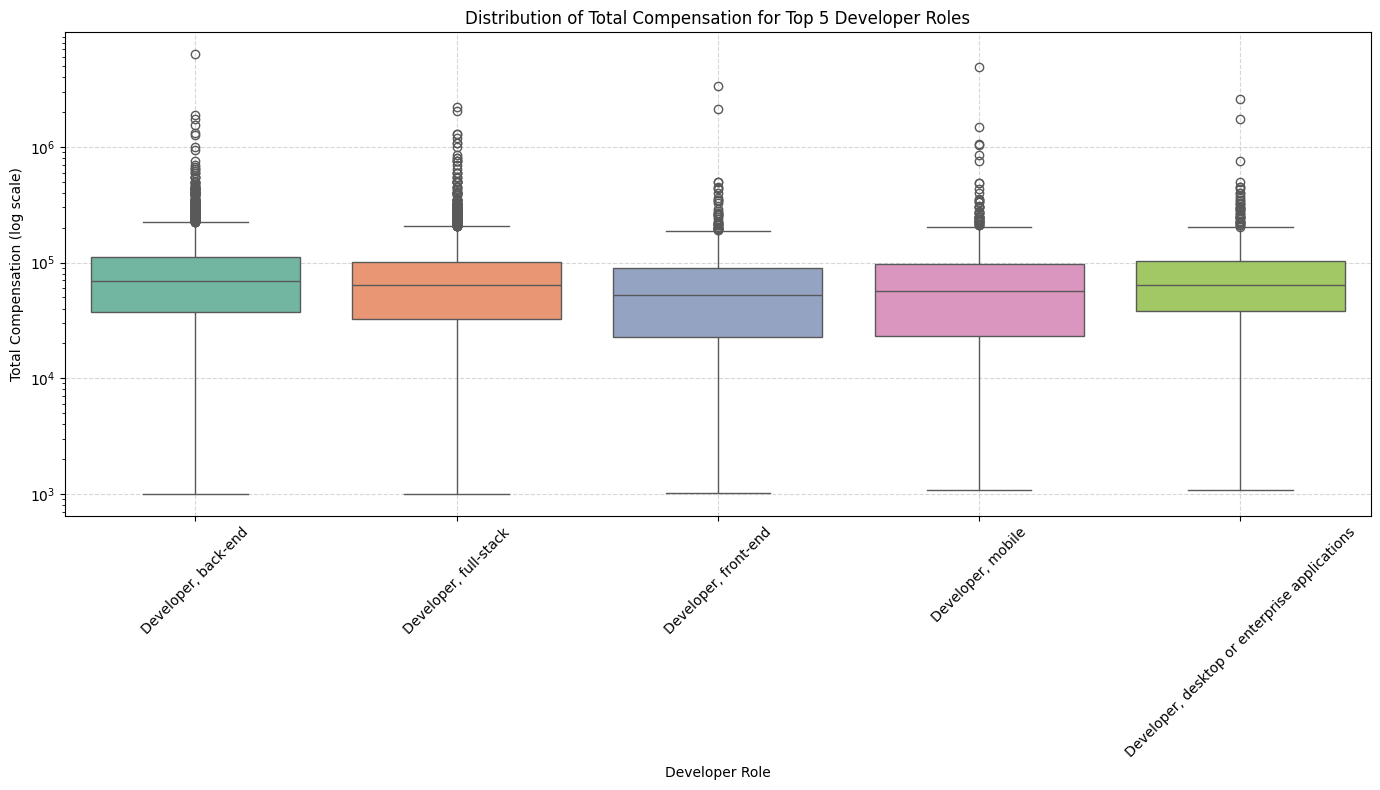

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Explode DevType
df_exploded = df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_exploded = df_exploded.to_frame(name='DevType')

# Repeat compensation values
df_exploded['ConvertedCompYearly'] = df['ConvertedCompYearly'].loc[df.index].repeat(df['DevType'].str.count(';') + 1).reset_index(drop=True)

# Filter top 5 developer types
top_5_devtypes = df_exploded['DevType'].value_counts().nlargest(5).index
df_top_5 = df_exploded[df_exploded['DevType'].isin(top_5_devtypes)]

# Filter out extreme values
df_top_5 = df_top_5[(df_top_5['ConvertedCompYearly'] >= 1e3) & 
                    (df_top_5['ConvertedCompYearly'] <= 1e10)]

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5, hue='DevType', palette='Set2')
plt.yscale('log')
plt.title('Distribution of Total Compensation for Top 5 Developer Roles')
plt.xlabel('Developer Role')
plt.ylabel('Total Compensation (log scale)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


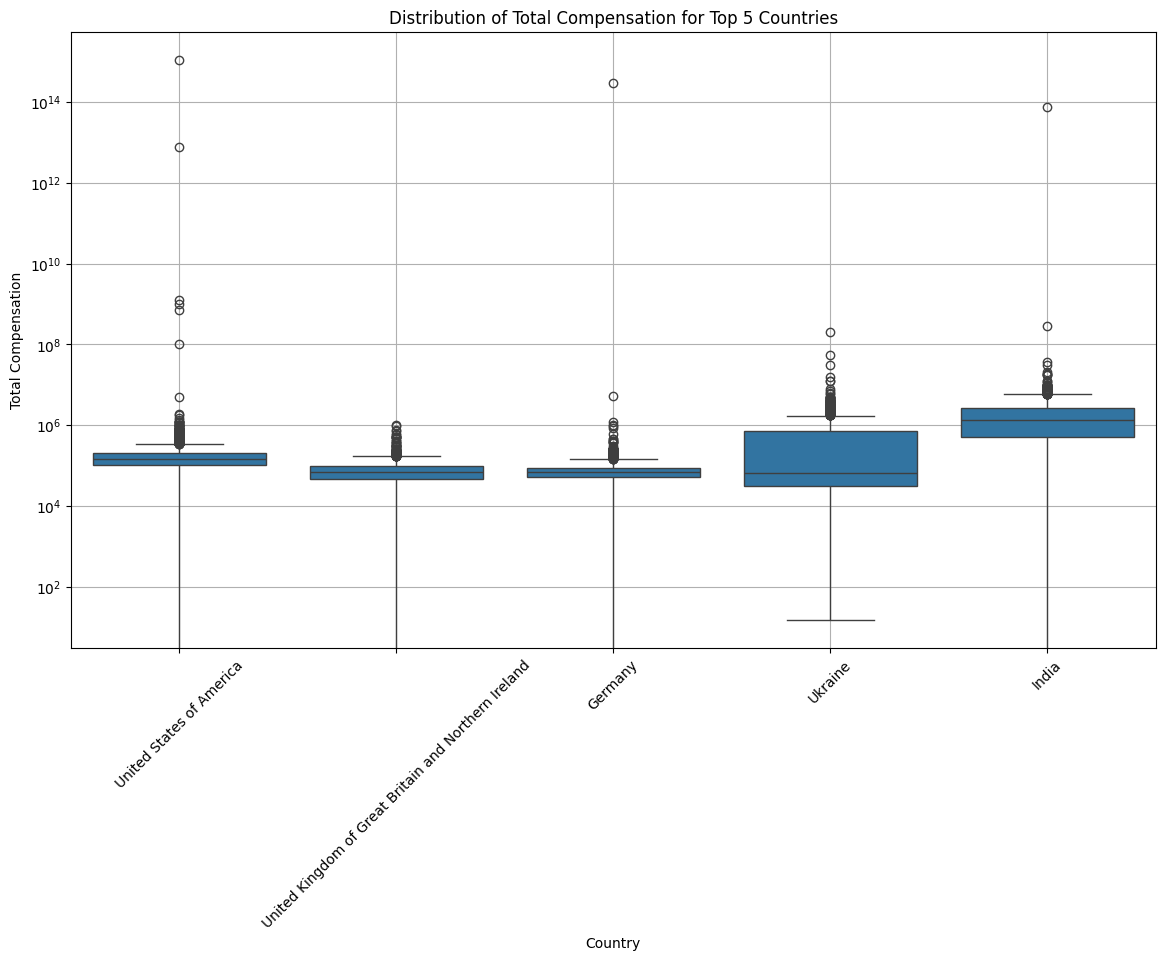

In [114]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Country, CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Get the top 5 countries
top_5_countries = df['Country'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Plot the box plot for CompTotal grouped by Country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top_5)
plt.title('Distribution of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.yscale('log')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [115]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Employment, CompTotal FROM main WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

In [116]:
# Simplify the employment types for readability
employment_mapping = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Not employed, and not looking for work': 'Not looking',
    'Not employed, but looking for work': 'Looking for work',
    'Retired': 'Retired',
    'Student, full-time': 'Full-time student',
    'Student, part-time': 'Part-time student',
    'Other': 'Other'
}
df['EmploymentSimplified'] = df['Employment'].map(employment_mapping)

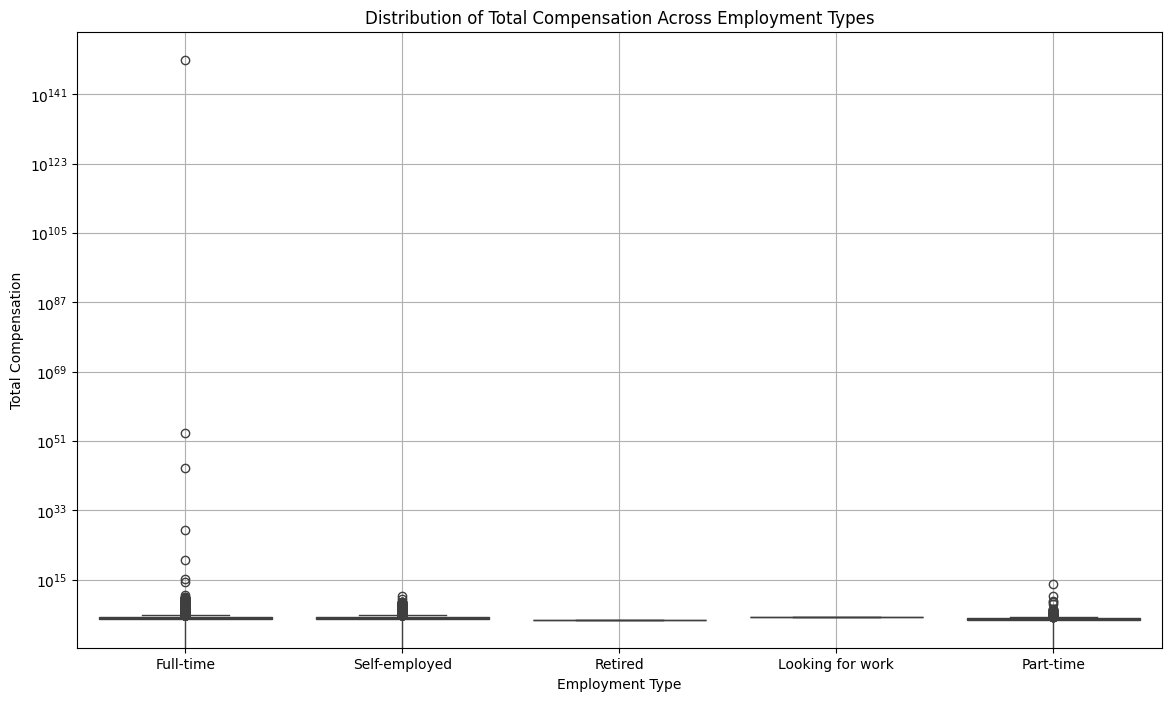

In [118]:
# Plot the box plot for CompTotal grouped by EmploymentSimplified
plt.figure(figsize=(14, 8))
sns.boxplot(x='EmploymentSimplified', y='CompTotal', data=df)
plt.title('Distribution of Total Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.yscale('log')
plt.ylabel('Total Compensation')
plt.grid(True)
plt.show()

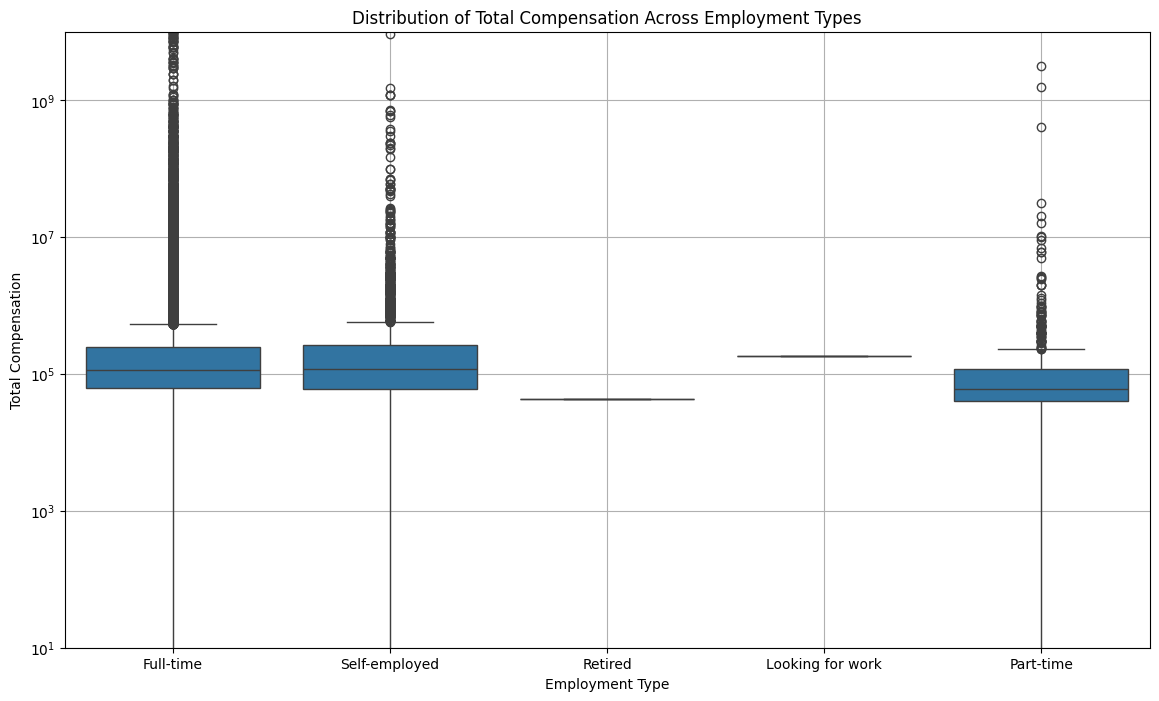

In [121]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='EmploymentSimplified', y='CompTotal', data=df)
plt.title('Distribution of Total Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.yscale('log')
plt.ylim(1e1,1e10)
plt.ylabel('Total Compensation')
plt.grid(True)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


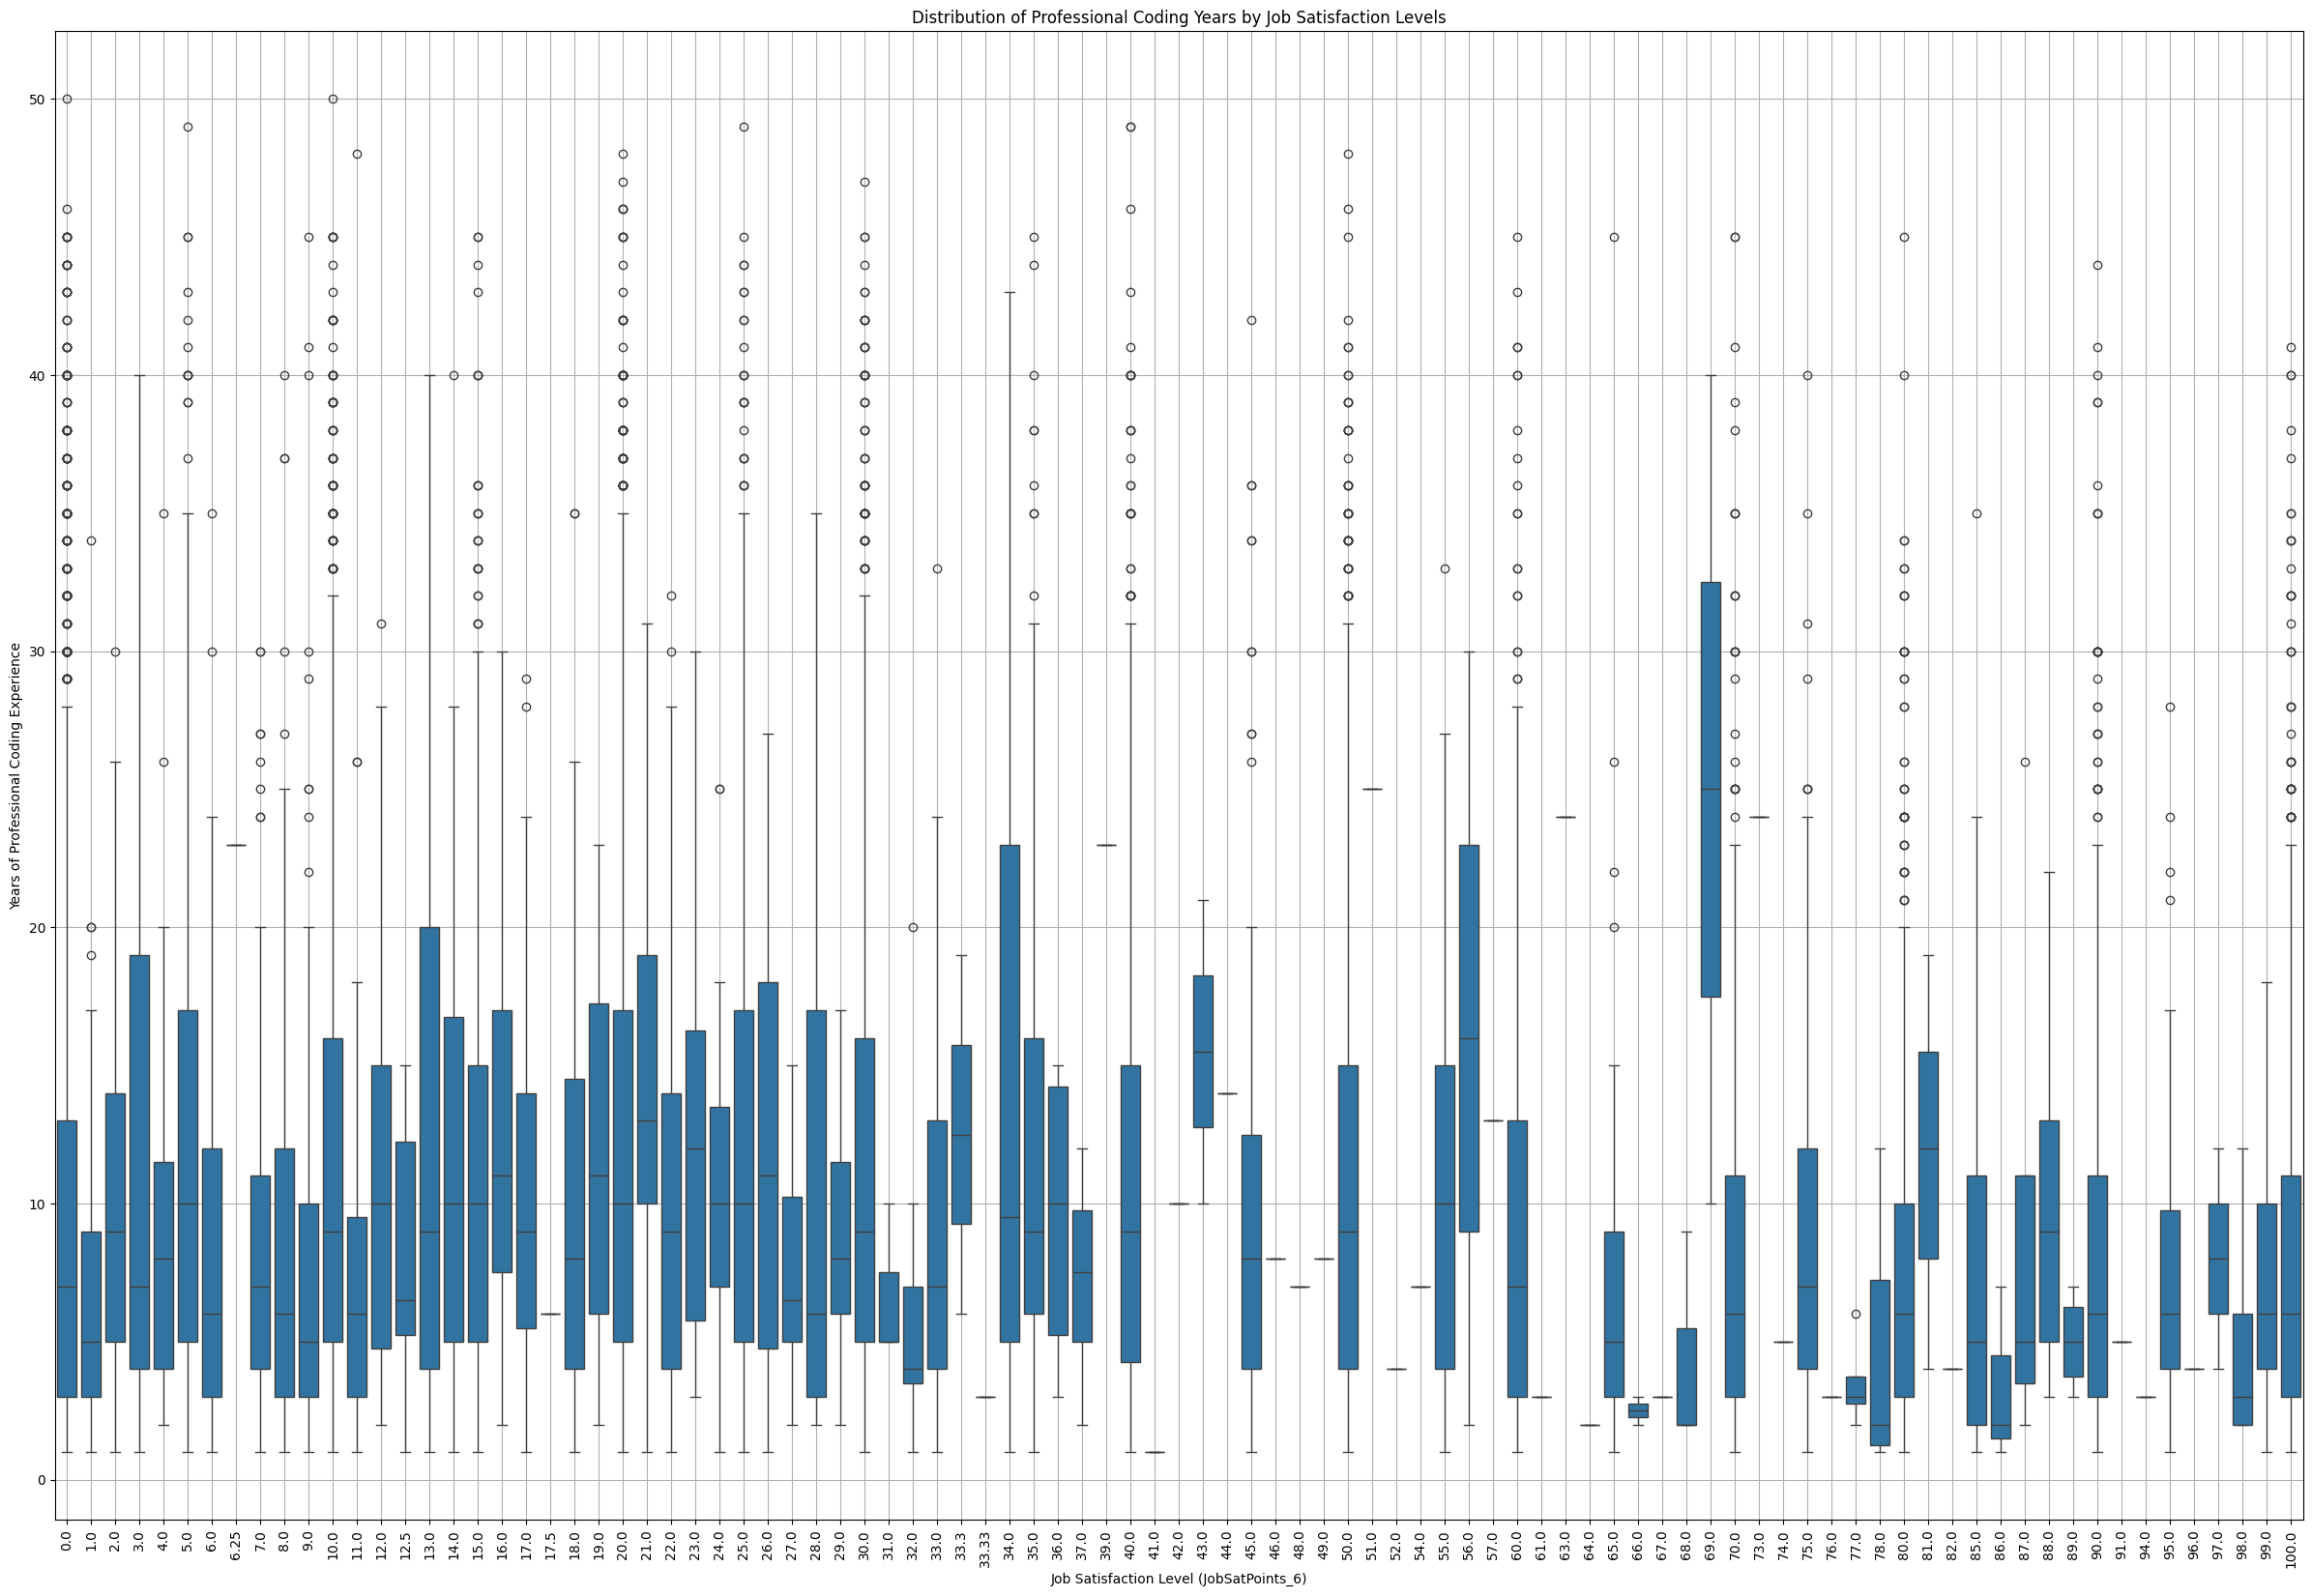

In [123]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert 'YearsCodePro' to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plot the box plot for YearsCodePro grouped by JobSatPoints_6
plt.figure(figsize=(30, 20))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)
plt.title('Distribution of Professional Coding Years by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.xticks(rotation=90)
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)

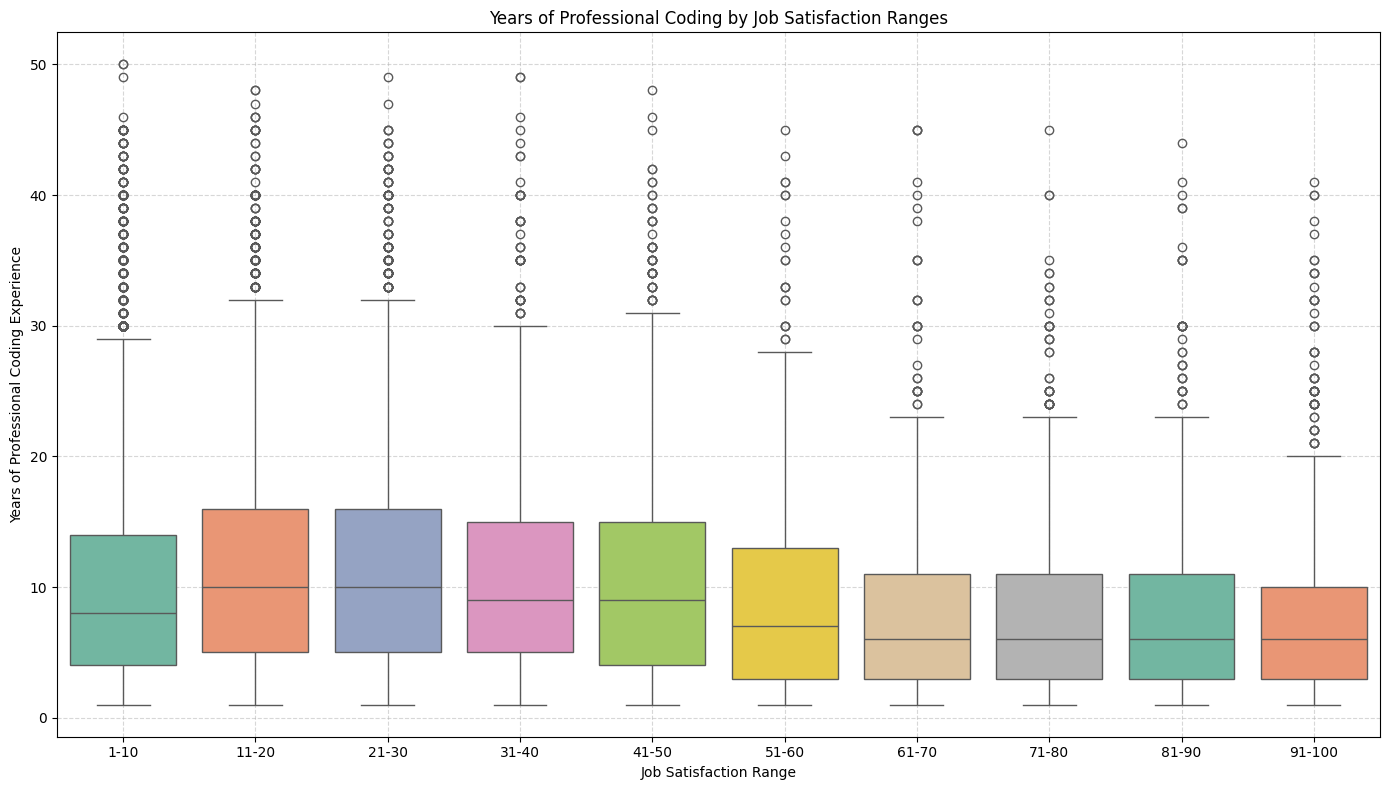

In [126]:
# Step 1: Filter out missing values
df_filtered = df[df['JobSatPoints_6'].notna() & df['YearsCodePro'].notna()].copy()

# Step 2: Convert to numeric
df_filtered['JobSatPoints_6'] = pd.to_numeric(df_filtered['JobSatPoints_6'], errors='coerce')
df_filtered['YearsCodePro'] = pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce')

# Step 3: Bin Job Satisfaction into ranges of 10
bins = list(range(0, 101, 10))  # [0, 10, 20, ..., 100]
labels = [f"{i+1}-{i+10}" for i in bins[:-1]]  # ['1-10', '11-20', ..., '91-100']
df_filtered['SatisfactionRange'] = pd.cut(df_filtered['JobSatPoints_6'], bins=bins, labels=labels, include_lowest=True)

# Step 4: Drop rows with NaN bins (e.g., if score was 0 or >100)
df_filtered = df_filtered[df_filtered['SatisfactionRange'].notna()]

# Step 5: Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='SatisfactionRange', y='YearsCodePro', data=df_filtered,hue='SatisfactionRange', palette='Set2')
plt.title('Years of Professional Coding by Job Satisfaction Ranges')
plt.xlabel('Job Satisfaction Range')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [127]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
